In [2]:
import pandas as pd     
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
from requests import head


year3Ctrl = pd.read_csv('./data_files/Year3Ctrl.csv')
year3Snd = pd.read_csv('./data_files/Year3SnD.csv')
year3overall = pd.read_csv('./data_files/Year3Overall.csv',header=1)
year3misc = pd.read_csv('./data_files/year3misc.csv')
optic = pd.read_csv('./data_files/OpTic.csv')
faze = pd.read_csv('./data_files/faze.csv')

In [4]:
year3overall

,Stage,Event,Game,Mode,Map,Team 1,Team 1 Score,Team 2,Team 2 Score,Winner,...,W%,GW,GL,GW%,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,1,Wk 1,1,Hardpoint,Gavutu,Royal Ravens,250,Mutineers,119,Royal Ravens,...,68.29%,102,70,59.30%,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Wk 1,2,SnD,Desert Siege,Royal Ravens,6,Mutineers,1,Royal Ravens,...,66.67%,90,55,62.07%,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Wk 1,3,Control,Gavutu,Royal Ravens,3,Mutineers,1,Royal Ravens,...,54.29%,76,69,52.41%,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Wk 1,1,Hardpoint,Bocage,Breach,237,Guerrillas,250,Guerrillas,...,54.84%,63,61,50.81%,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Wk 1,2,SnD,Tuscan,Breach,6,Guerrillas,3,Breach,...,50.00%,65,62,51.18%,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,4,Major,4,Hardpoint,Berlin,Thieves,250,Subliners,140,Thieves,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,4,Major,5,SnD,Bocage,Thieves,4,Subliners,6,Subliners,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785,4,Major,6,Control,Gavutu,Thieves,3,Subliners,1,Thieves,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,4,Major,7,SnD,Berlin,Thieves,6,Subliners,1,Thieves,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Game_details = year3overall[['Stage', 'Event', 'Game', 'Mode', 'Map ', 'Team 1', 'Team 1 Score', 'Team 2', 'Team 2 Score', 'Winner']]

In [6]:
year3overall.columns

Index(['Stage', 'Event', 'Game', 'Mode', 'Map ', 'Team 1', 'Team 1 Score',
       'Team 2', 'Team 2 Score', 'Winner', 'Unnamed: 10', 'Stage.1',
       'Event/Link', 'Team 1.1', 'Team 1 Wins', 'Team 2.1', 'Team 2 Wins',
       'Winner.1', 'Unnamed: 18', 'Rank', 'Team', 'Total Pts', 'Stage Pts',
       'Major Pts', 'Major Wins', 'W', 'L', 'W%', 'GW', 'GL', 'GW%',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36'],
      dtype='object')

In [7]:
match_details = year3overall[['Stage.1',
       'Event/Link', 'Team 1.1', 'Team 1 Wins', 'Team 2.1', 'Team 2 Wins',
       'Winner.1',]]

In [8]:
match_details=match_details[:192]

In [9]:
Overall_standings = year3overall[['Rank', 'Team', 'Total Pts', 'Stage Pts',
       'Major Pts', 'Major Wins', 'W', 'L', 'W%', 'GW', 'GL', 'GW%']]

In [10]:
Overall_standings=Overall_standings[:12]

In [11]:
year3hp = pd.read_csv('./data_files/Year3HP.csv', header=18)
year3hp.columns

Index(['Bocage', '11.99', 'Unnamed: 2', 'Unnamed: 3', 'Map', 'Hill', 'PPH',
       'Unnamed: 7', 'PPGA = Points Per Game Against', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Team', 'W',
       'L', 'Win%', 'PPG', 'PPGA', 'PF', 'PA', 'P/M', 'PPH.1', 'PPHA', 'PF.1',
       'PA.1', 'P/M.1', 'H', 'PPH.2', 'PPHA.1', 'PF.2', 'PA.2', 'P/M.2', 'H.1',
       'PPH.3', 'PPHA.2', 'PF.3', 'PA.3', 'P/M.3', 'H.2', 'PPH.4', 'PPHA.3',
       'PF.4', 'PA.4', 'P/M.4', 'H.3', 'PPH.5', 'PPHA.4', 'PF.5', 'PA.5',
       'P/M.5', 'H.4', '50 Pt Hill', '0 Pt Hill', '50 PHA', 'Shutouts'],
      dtype='object')

In [12]:
bocage = year3hp[['Team', 'W',
       'L', 'Win%', 'PPG', 'PPH.1', 'H', 'PPH.2', 'H.1',
       'PPH.3', 'H.2', 'PPH.4',  'H.3', 'PPH.5', 'H.4',
        '50 Pt Hill', '0 Pt Hill', '50 PHA', 'Shutouts']][:12]

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sreno\anacond

Text(0.5, 1.0, 'P5 Hold Times')

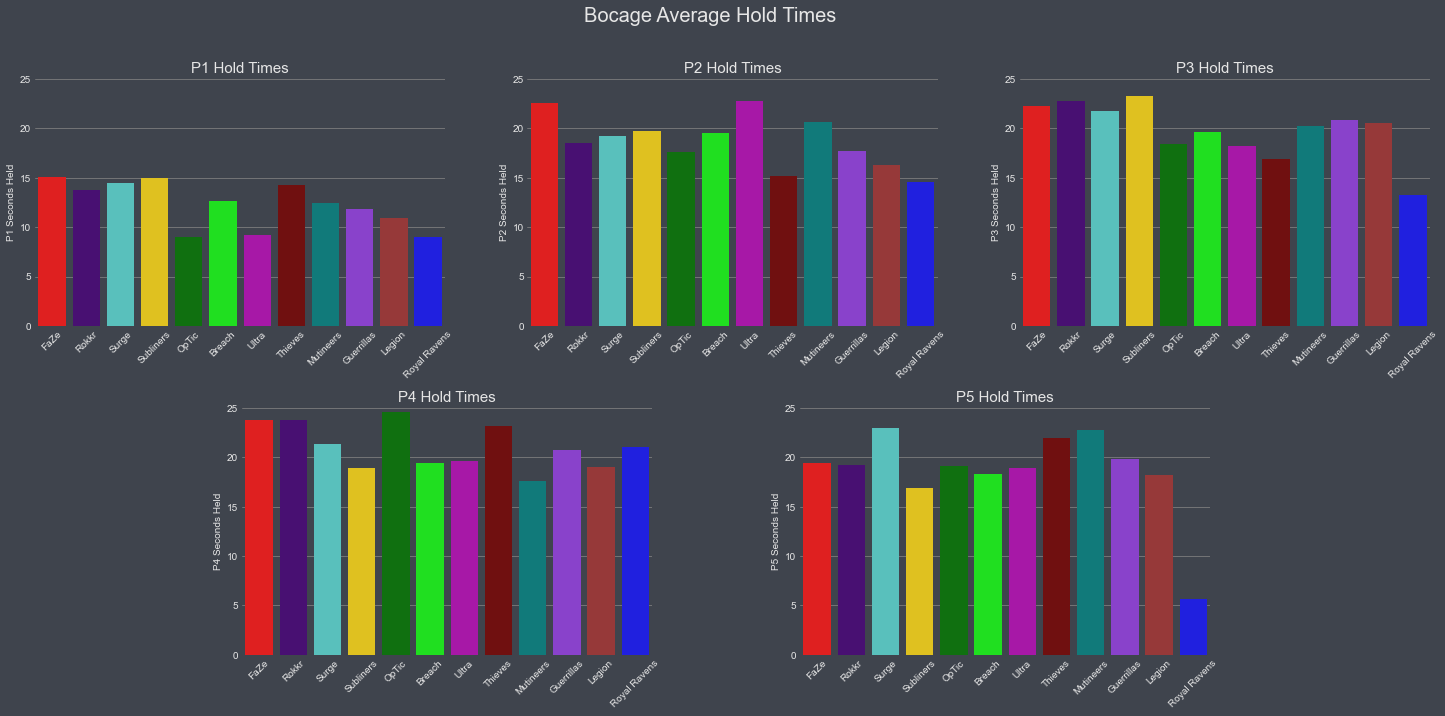

In [29]:
plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#3f444d'  # bluish dark grey
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

    
fig, axes = plt.subplots(2,3, figsize=(25,10))
fig.suptitle('Bocage Average Hold Times', fontsize=20)



axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.08,0.228,0.343])
axes[1][1].set_position([0.55,0.08,0.228,0.343])

colors = ['Red' , 'indigo', 'mediumturquoise', 'gold', 'g', 'Lime', 'm', 'maroon', 'darkcyan', 'blueviolet', 'Brown', 'blue']



ax1 = sns.barplot(bocage['Team'], bocage['PPH.1'].astype(float),palette=colors, ax=axes[0][0])
ax1.set_ylabel('P1 Seconds Held')
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45)
ax1.set_ylim(0, 25)
ax1.grid(axis='y', color='grey')
ax1.set_title('P1 Hold Times', fontsize=15)

ax2 = sns.barplot(bocage['Team'], bocage['PPH.2'].astype(float),palette=colors, ax=axes[0][1])
ax2.set_ylabel('P2 Seconds Held')
ax2.set_xlabel('')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45)
ax2.set_ylim(0, 25)
ax2.grid(axis='y', color='grey')
ax2.set_title('P2 Hold Times', fontsize=15)


ax3 =sns.barplot(bocage['Team'], bocage['PPH.3'].astype(float),palette=colors,  ax=axes[0][2])
ax3.set_ylabel('P3 Seconds Held')
ax3.set_xlabel('')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 45)
ax3.set_ylim(0, 25)
ax3.grid(axis='y', color='grey')
ax3.set_title('P3 Hold Times', fontsize=15)


ax4 =sns.barplot(bocage['Team'], bocage['PPH.4'].astype(float), palette=colors, ax=axes[1][0])
ax4.set_ylabel('P4 Seconds Held')
ax4.set_xlabel('')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 45)
ax4.set_ylim(0, 25)
ax4.grid(axis='y', color='grey')
ax4.set_title('P4 Hold Times', fontsize=15)


ax5 =sns.barplot(bocage['Team'], bocage['PPH.5'].astype(float),palette=colors,  ax=axes[1][1])
ax5.set_ylabel('P5 Seconds Held')
ax5.set_xlabel('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation = 45)
ax5.set_ylim(0, 25)
ax5.grid(axis='y', color='grey')
ax5.set_title('P5 Hold Times', fontsize=15)




In [14]:
week1= pd.read_csv('./data_files/S1Wk1.csv', header=2)

In [15]:

week1.drop(columns=['Unnamed: 243', 'Unnamed: 244', 'Unnamed: 245', 'Unnamed: 246',
       'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249', 'Unnamed: 250',
       'Unnamed: 251', 'Unnamed: 252'], inplace=True)

In [16]:
week1 = week1[['Map', 'Team', 'P1', 'P2', 'P3', 'P4', 'P5', 'P1.1', 'P2.1', 'P3.1',
       'P4.1', 'P5.1', 'P1.2', 'P2.2', 'P3.2', 'P4.2', 'P5.2', 'Total']]



In [17]:
week1 = week1.iloc[[0,1,4,5,8,9,12,13,16,17,20,21,24,25,28,29,32,33,36,37,40,41,44,45,48,49,52,53,56,57,60,61,64,65, 68,69]]

In [18]:
week2 = pd.read_csv('./data_files/S1 Wk2.csv',header=2)
week2 = week2[['Map', 'Team', 'P1', 'P2', 'P3', 'P4', 'P5', 'P1.1', 'P2.1', 'P3.1',
       'P4.1', 'P5.1', 'P1.2', 'P2.2', 'P3.2', 'P4.2', 'P5.2', 'Total']]
week2[:66]
rows = []
for x in range(0,66,4):
    rows.append(x)
    rows.append(x+1)

week2 = week2.iloc[rows]


week1 = week1.append(week2, ignore_index=True)

In [19]:
week3 = pd.read_csv('./data_files/S1 Wk3.csv',header=2)
week3 = week3[['Map', 'Team', 'P1', 'P2', 'P3', 'P4', 'P5', 'P1.1', 'P2.1', 'P3.1',
       'P4.1', 'P5.1', 'P1.2', 'P2.2', 'P3.2', 'P4.2', 'P5.2', 'Total']]
week3[:66]
rows = []
for x in range(0,66,4):
    rows.append(x)
    rows.append(x+1)

week3 = week3.iloc[rows]


week1 = week1.append(week3, ignore_index=True)

In [20]:
week4 = pd.read_csv('./data_files/S1 Major.csv',header=2)
week4 = week4[['Map', 'Team', 'P1', 'P2', 'P3', 'P4', 'P5', 'P1.1', 'P2.1', 'P3.1',
       'P4.1', 'P5.1', 'P1.2', 'P2.2', 'P3.2', 'P4.2', 'P5.2', 'Total']]
week4[:122]
rows = []
for x in range(0,122,4):
    rows.append(x)
    rows.append(x+1)

week4= week4.iloc[rows]


week1 = week1.append(week4, ignore_index=True)

In [21]:
all_hps = week1

In [22]:
week1 = pd.read_csv('./data_files/S4 Major.csv',header=2)
week1 = week1[['Map', 'Team', 'P1', 'P2', 'P3', 'P4', 'P5', 'P1.1', 'P2.1', 'P3.1',
       'P4.1', 'P5.1', 'P1.2', 'P2.2', 'P3.2', 'P4.2', 'P5.2', 'Total']]
week1[:134]
rows = []
for x in range(0,134,4):
    rows.append(x)
    rows.append(x+1)

week1 = week1.iloc[rows]


all_hps = all_hps.append(week1, ignore_index=True)

In [23]:
all_hps

,Map,Team,P1,P2,P3,P4,P5,P1.1,P2.1,P3.1,P4.1,P5.1,P1.2,P2.2,P3.2,P4.2,P5.2,Total
0,Gavutu,Mutineers,0,50,8,25,11,0,25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119
1,Gavutu,Royal Ravens,40,0,45,32,29,45,26,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250
2,Bocage,Guerrillas,9,0,30,15,28,8,19,20,48,4,23,22,24,NaN,NaN,250
3,Bocage,Breach,7,49,12,30,7,13,24,23,6,42,3,9,12,NaN,NaN,237
4,Berlin,Guerrillas,12,13,50,1,12,24,2,23,16,37,47,9,4,NaN,NaN,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Bocage,Thieves,12,0,28,21,15,20,38,8,23,32,8,0,NaN,NaN,NaN,205
230,Berlin,Subliners,9,10,43,0,0,33,12,10,23,NaN,NaN,NaN,NaN,NaN,NaN,140
231,Berlin,Thieves,31,30,8,55,27,20,34,40,5,NaN,NaN,NaN,NaN,NaN,NaN,250
232,Tuscan,Subliners,3,24,13,18,34,0,33,7,31,NaN,NaN,NaN,NaN,NaN,NaN,163


In [24]:
all_hps.reset_index(inplace=True)
all_hps.drop(columns=['index'], inplace=True)

In [25]:
week1.reset_index(inplace=True)
week1.drop(columns=['index'], inplace=True)

In [374]:
def get_df(team_1, team_2, map, week1):
    tusk = week1[(week1['Map'].str.lower() == map.lower() )]
    index_list = tusk.loc[(tusk['Team'].str.lower() == team_1.lower()) | (tusk['Team'].str.lower() == team_2.lower())].index


    match_lst = []
    for i in range(len(index_list)):
        index_list.sort_values(ascending=True) 
        if index_list[i]-1 == index_list[i-1]:
            match_lst.append(index_list[i])
            match_lst.append(index_list[i] -1) 
    
    test=week1.loc[match_lst].reset_index()
    test.drop(columns=['index'], inplace=True)
    test.dropna(axis=1,inplace=True)

    repeat = len(test)/2
    if repeat >= 2.0:
        return test, repeat

    else:
        return test, 1
    


def hill_vals(test):
    cols = test.columns[2:-1]
    hills =[]
    for value in cols:
        hills.append(value)
        hills.append(value)
    return hills
    

def add_teams(test):
    teams=[]
    for col in test.columns[2:-1]:
        teams.append(test['Team'][0])
        teams.append(test['Team'][1])

    return teams

def get_scores(test):
    score= []
    for col in test.columns[2:-1]:
        score.append(test[col][test.index[0]])
        score.append(test[col][test.index[1]])

    return score




def make_df_1(teams, hills,score, x):
    data= pd.DataFrame(columns=['Team', 'Hills', 'Score'])


    data['Team'] = teams
    data['Hills'] = hills
    data['Score'] = score
    data['game'] = x


    return data


def make_df_2(teams,hills,score, x):
    blank= pd.DataFrame(columns=['Team', 'Hills', 'Score'],)


    blank['Team'] = teams
    blank['Hills'] = hills
    blank['Score'] = score
    blank['game'] = x


    return blank




def add_team_1_total(data, team_1):
    team_1_df = data[data['Team'].str.lower() == team_1.lower()].reset_index()
    total = int(team_1_df['Score'][0])
    team_1_df_totals = [int(team_1_df['Score'][0])]
    for x in team_1_df['Score'][1:]:
        total = total + int(x)
        team_1_df_totals.append(total)

    return team_1_df_totals

def add_team_2_total(data, team_2):
    team_2_df = data[data['Team'].str.lower() == team_2.lower()].reset_index()
    total = int(team_2_df['Score'][0])
    
    team_2_df_totals = [int(team_2_df['Score'][0])]

    for x in team_2_df['Score'][1:]:
        total = total + int(x)
        team_2_df_totals.append(total)
    return team_2_df_totals


def final_totals(data, team_1_totals, team_2_totals):
    team_total = []
    for x in range(len(team_2_totals)):
        team_total.append(team_1_totals[x])
        team_total.append(team_2_totals[x])

    data['Total'] = team_total



def make_final(df_1,df_2):
    data = df_1.append(df_2,ignore_index=True)
    
    return data


def make_plot(data, map):
    fig = plt.figure(figsize=(10,6))
    ax = sns.lineplot(data['Hills'], data['Total'], hue=data['Team'], )
    plt.title(map[0].upper() + map[1:].lower() + ' Hard Point Match '+ str(data['Team'][0])+ ' VS ' + str(data['Team'][1]), fontsize=15)
    plt.xlabel('Hills', fontsize=13)
    plt.ylabel('Points', fontsize=13)
    plt.grid(axis='y')
    plt.legend(loc=(.89,.99))
    return plt.show()


In [375]:
import time
def HardPoint(team_1, team_2, map, week1):
    test, repeat=get_df(team_1, team_2, map, week1) 
    for x in range(int(repeat)):
        hills = hill_vals(test)
        teams = add_teams(test)
        score = get_scores(test)
        if x <= 0:
            df_1 = make_df_1(teams, hills,score, x)
            team_1_totals = add_team_1_total(df_1,team_1)
            team_2_totals = add_team_1_total(df_1,team_2)
            final_team_total = final_totals(df_1, team_1_totals, team_2_totals)
        else:
            df_2 = make_df_2(teams, hills,score, x)
            team_1_totals = add_team_1_total(df_2,team_1)
            team_2_totals = add_team_1_total(df_2,team_2)
            final_team_total = final_totals(df_2, team_1_totals, team_2_totals)
            df_1 = make_final(df_1, df_2)
    


    return df_1




In [401]:

data = HardPoint('Guerrillas', 'Royal Ravens', 'berlin', all_hps)
data

,Team,Hills,Score,game,Total
0,Guerrillas,P1,27,0,27
1,Royal Ravens,P1,12,0,12
2,Guerrillas,P2,20,0,47
3,Royal Ravens,P2,19,0,31
4,Guerrillas,P3,25,0,72
5,Royal Ravens,P3,20,0,51
6,Guerrillas,P4,52,0,124
7,Royal Ravens,P4,0,0,51
8,Guerrillas,P5,10,0,134
9,Royal Ravens,P5,11,0,62


In [399]:
def find_match(team_1, team_2, map, week1):
    tusk = week1[(week1['Map'].str.lower() == map.lower() )]
    index_list = tusk.loc[(tusk['Team'].str.lower() == team_1.lower()) | (tusk['Team'].str.lower() == team_2.lower())].index


    
    match_lst = []
    for i in range(len(index_list)):
        index_list.sort_values(ascending=True) 
        if index_list[i]-1 == index_list[i-1]:
            match_lst.append(index_list[i])
            match_lst.append(index_list[i] -1) 
    
    test=week1.loc[match_lst].reset_index()
    test.drop(columns=['index'], inplace=True)
    test.dropna(axis=1,inplace=True)

    return test

for team in all_hps['Team'].unique():
    for team_2 in all_hps['Team'].unique():
        for map in all_hps['Map'].unique():
            data = find_match(team, team_2, map, all_hps)
            if len(data) > 4: 
                print(data)

      Map          Team  P1  P2  P3  P4  P5 P1.1 P2.1 P3.1 P4.1 Total
0  Berlin    Guerrillas  27  20  25  52  10   27   12   16   39   250
1  Berlin  Royal Ravens  12  19  20   0  11   20   24   30    5   159
2  Berlin    Guerrillas   3  19  13   9   4   10    2   29    9    98
3  Berlin  Royal Ravens  43  24  35  25  21   41   46   13    2   250
4  Berlin  Royal Ravens  28  22  26   1  13   14   26    3   50   191
5  Berlin    Guerrillas  13  26  28  41  12   32   12   49    6   250
      Map          Team  P1  P2  P3  P4  P5 P1.1 P2.1 P3.1 P4.1 Total
0  Berlin    Guerrillas  27  20  25  52  10   27   12   16   39   250
1  Berlin  Royal Ravens  12  19  20   0  11   20   24   30    5   159
2  Berlin    Guerrillas   3  19  13   9   4   10    2   29    9    98
3  Berlin  Royal Ravens  43  24  35  25  21   41   46   13    2   250
4  Berlin  Royal Ravens  28  22  26   1  13   14   26    3   50   191
5  Berlin    Guerrillas  13  26  28  41  12   32   12   49    6   250
      Map     Team  

In [398]:
len(data)

4

In [396]:
all_hps['Team'].unique()

array(['Mutineers', 'Royal Ravens', 'Guerrillas', 'Breach', 'Surge',
       'Subliners', 'Legion', 'FaZe', 'OpTic', 'Ultra', 'Thieves',
       'Rokkr'], dtype=object)